In [1]:
from utils import *

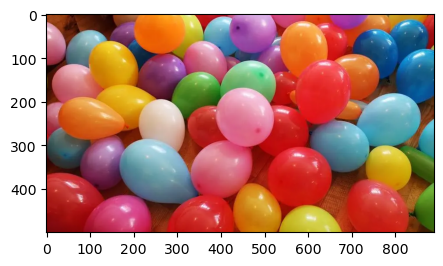

In [43]:
img = readImage('./input/ballons.png')
showImage(img)

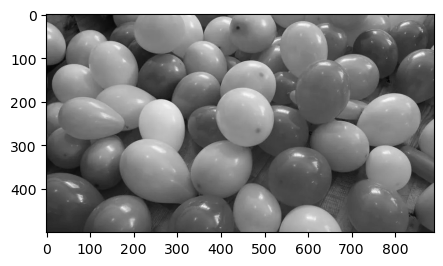

In [45]:
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
showImage(img_gray, cmap='gray')


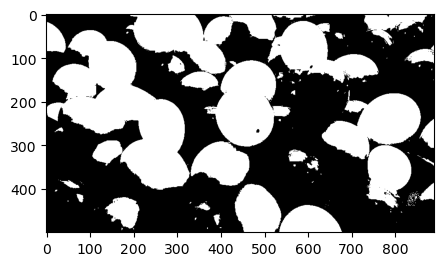

In [47]:
ret, thresh = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
showImage(thresh, cmap='gray')

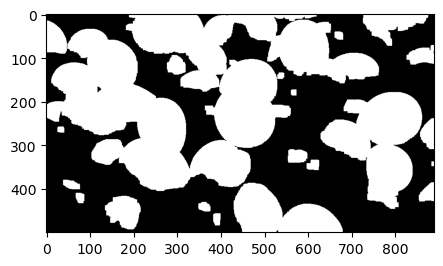

In [49]:
kernel = np.ones((3,3), np.uint8)
opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv.dilate(opening, kernel, iterations=3)
showImage(sure_bg, cmap='gray')

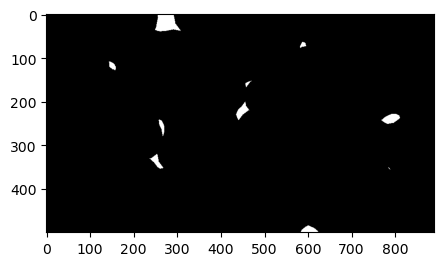

In [51]:
dist_transform = cv.distanceTransform(opening, cv.DIST_L2, 5)
ret, sure_fg = cv.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
showImage(sure_fg, cmap='gray')

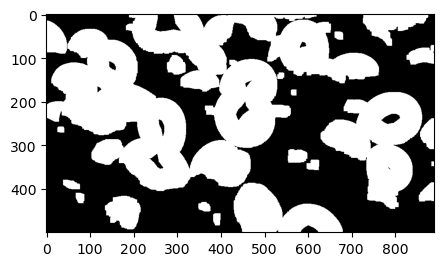

In [53]:
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg, sure_fg)
showImage(unknown, cmap='gray')

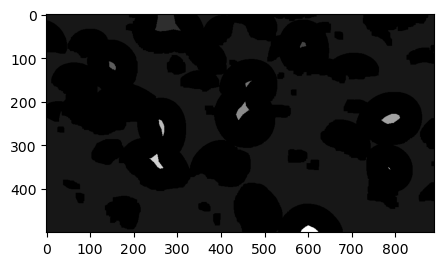

In [125]:
ret, markers = cv.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown==255] = 0
showImage(markers, cmap="gray")

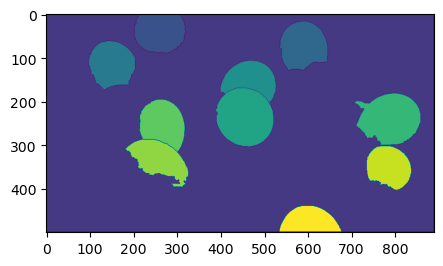

In [137]:
markers = cv.watershed(img,markers) 
img[markers == -1] = [255,0,0]
showImage(markers)